In [2]:
import pandas as pd
import numpy as np 
from matplotlib import *
import seaborn as sns
%matplotlib inline
#from mitosheet import *

In [3]:
df = pd.read_csv("D:/Projects/test_data/teams.csv", low_memory=False)

In [4]:
df.head()

,Player_ID,Full_Name,First_Name,Last_Name,Position,Age,Birth_Date,Birth_Place,Birth_Country,Nationality,...,Penalty.commited,Penalty.success,Penalty.missed,Penalty.saved,Games.appearences,Games.minutes_played,Games.lineups,Substitutes.in,Substitutes.out,Substitutes.bench
0,106805,Yossi Shai Benayoun,Yossi Shai,Benayoun,Midfielder,39,05/05/1980,Dimona,Israel,Israel,...,0,0,0,0,19,902,10,9,8,22
1,106805,Yossi Shai Benayoun,Yossi Shai,Benayoun,Midfielder,39,05/05/1980,Dimona,Israel,Israel,...,0,0,0,0,3,270,3,0,0,0
2,106805,Yossi Shai Benayoun,Yossi Shai,Benayoun,Midfielder,39,05/05/1980,Dimona,Israel,Israel,...,0,0,0,0,0,0,0,0,0,3
3,106805,Yossi Shai Benayoun,Yossi Shai,Benayoun,Midfielder,39,05/05/1980,Dimona,Israel,Israel,...,0,0,0,0,3,196,2,1,0,4
4,115944,Patrick Vieira,Patrick,Vieira,Midfielder,37,23/06/1976,Dakar,Senegal,France,...,0,0,0,0,32,2797,32,0,3,0


In [5]:
df.keys()

Index(['Player_ID', 'Full_Name', 'First_Name', 'Last_Name', 'Position', 'Age',
       'Birth_Date', 'Birth_Place', 'Birth_Country', 'Nationality', 'Height',
       'Weight', 'Injured', 'Rating', 'Team_ID', 'Team', 'League_ID', 'League',
       'Season', 'Captain', 'Shots.total', 'Shots.on', 'Goals.total',
       'Goals.conceded', 'Goals.assists', 'Goals.saves', 'Passes.total',
       'Passes.key', 'Passes.accuracy', 'Tackles.total', 'Tackles.blocks',
       'Tackles.interceptions', 'Duels.total', 'Duels.won',
       'Dribbles.attempts', 'Dribbles.success', 'Fouls.drawn',
       'Fouls.committed', 'Cards.yellow', 'Cards.yellowred', 'Cards.red',
       'Penalty.won', 'Penalty.commited', 'Penalty.success', 'Penalty.missed',
       'Penalty.saved', 'Games.appearences', 'Games.minutes_played',
       'Games.lineups', 'Substitutes.in', 'Substitutes.out',
       'Substitutes.bench'],
      dtype='object')

In [6]:
df.Season.unique()

array(['2011-2012', '2004-2005', '2003-2004', '2015-2016', '2014-2015',
       '2013-2014', '2007-2008', '2006-2007', '2005-2006', '2016', '2014',
       nan, '2008', '2012', '2011', '2009-2010', '2018-2019', '2019',
       '2018', '2012-2013', '2008-2009', '2002-2003', '2010-2011', '2015',
       '2013', '2017', '2017-2018', '2016-2017', '2020', '2020-2021',
       '2019-2020', '2012 Japan', '1998-1999', '1997-1998', '1996-1997',
       '1995-1996', '1993-1994', '1991-1992', '2001-2002', '2000-2001',
       '1999-2000', '1992-1993', '2009', '2019 Qatar', '2008 Japan',
       '1990-1991', '2013 Mo&hellip;', '2020 Qatar', '2009 UAE', '2010',
       '2011 Japan', '2015 Japan', '2014 Mo&hellip;', '2016 Japan',
       '2018 UAE', '2017 UAE', '2010 UAE'], dtype=object)

Total Goals Scored
1. Find the sum of the total number of goals scored per player (create totals column for goals scored per player)
2. Remove duplicated rows 

In [193]:
# Find the total goals scored by each team in 2020

#df_2020 = df_2020.groupby(['Team'], as_index=False)['Goals.total'].sum()
#df_2020.head()

,Team,Goals.total
0,1899 Hoffenheim,59
1,AC Milan,68
2,AS Roma,88
3,Alaves,36
4,Angers,40


In [22]:
# Check the amount of null values in dataset 
df_2020.isnull().sum()

Player_ID                0
Full_Name                0
Age                      0
Team_ID                  0
League_ID                0
Captain                  0
Shots.total              0
Shots.on                 0
Goals.total              0
Goals.conceded           0
Goals.assists            0
Goals.saves              0
Passes.total             0
Passes.key               0
Passes.accuracy          0
Tackles.total            0
Tackles.blocks           0
Tackles.interceptions    0
Duels.total              0
Duels.won                0
Dribbles.attempts        0
Dribbles.success         0
Fouls.drawn              0
Fouls.committed          0
Cards.yellow             0
Cards.yellowred          0
Cards.red                0
Penalty.won              0
Penalty.commited         0
Penalty.success          0
Penalty.missed           0
Penalty.saved            0
Games.appearences        0
Games.minutes_played     0
Games.lineups            0
Substitutes.in           0
Substitutes.out          0
S

In [15]:
# Fill null values with their mean
df = df.fillna(df.mean())

In [7]:
# Subset data to 2020 results
df_2020 = df[df['Season'].str.contains('2019-2020', na = False)]
prem_league_2020 = df_2020[df_2020['League'].str.contains('Premier League', na = False)]

In [26]:
df_2020 = df_2020.drop(columns=['Player_ID', 'League_ID', 'First_Name', 'Last_Name', 'Position', 'Birth_Date','Birth_Place', 'Birth_Country', 'Nationality', 'Height', 'Weight', 'Rating','Injured', 'Team', 'League', 'Season'])

In [27]:
df_2020.head()

,Full_Name,Age,Team_ID,Captain,Shots.total,Shots.on,Goals.total,Goals.conceded,Goals.assists,Goals.saves,...,Penalty.commited,Penalty.success,Penalty.missed,Penalty.saved,Games.appearences,Games.minutes_played,Games.lineups,Substitutes.in,Substitutes.out,Substitutes.bench
486,M. Ozil,33,42,0,9,3,1,0,2,0,...,0,0,0,0,18,1449,18,0,11,4
495,M. Ozil,33,42,1,1,0,0,0,1,0,...,0,0,0,0,2,136,2,0,2,0
496,M. Ozil,33,42,0,0,0,0,0,0,0,...,0,0,0,0,1,77,1,0,1,1
509,M. Ozil,33,42,0,1,0,0,0,0,0,...,0,0,0,0,2,150,1,1,0,1
566,J. Willock,22,42,0,15,5,1,0,1,0,...,0,0,0,0,29,844,8,21,7,27


In [9]:
# Introducing the Autoplotter: the simple GUI for easy EDA 
from autoplotter import run_app

In [10]:
# Let the EDA...begin!!
run_app(prem_league_2020, mode='inline')

In [ ]:
# Correlation Matrix

### Let's see the variables that have a strong/weak relationship with each other

import matplotlib.pyplot as plt
%matplotlib inline


corrmat = df_2020.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
g = sns.heatmap(df_2020[top_corr_features].corr(), 
                annot=True, 
                cmap="RdYlGn")

In [43]:
data = pd.get_dummies(df_2020, drop_first=False)
data

,Age,Team_ID,Captain,Shots.total,Shots.on,Goals.total,Goals.conceded,Goals.assists,Goals.saves,Passes.total,...,Full_Name_Z. Ferhat,Full_Name_Z. Ibrahimovic,Full_Name_Z. Medley,Full_Name_Z. Ould Khaled,Full_Name_Z. Youssouf,Full_Name_Zabarte,Full_Name_Zak Ruggiero,Full_Name_Zaldua,Full_Name_Zubeldia,Full_Name_Zurutuza
486,33,42,0,9,3,1,0,2,0,738,...,0,0,0,0,0,0,0,0,0,0
495,33,42,1,1,0,0,0,1,0,82,...,0,0,0,0,0,0,0,0,0,0
496,33,42,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
509,33,42,0,1,0,0,0,0,0,91,...,0,0,0,0,0,0,0,0,0,0
566,22,42,0,15,5,1,0,1,0,284,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109531,28,95,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
109534,29,95,0,0,0,0,32,0,73,471,...,0,0,0,0,0,0,0,0,0,0
109536,29,95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109537,29,95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalise data




In [30]:
from sklearn import preprocessing

x = df_2020.iloc[:,1:].values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scaled)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # Squeezing our 35+ dimenstions(columns) into 2 columns i.e. dimensionality reduction technique 
reduced = pd.DataFrame(pca.fit_transform(x_norm))

In [42]:
names = df_2020.Full_Name.tolist()

## K-Means approach

1. Data Cleaning

- Convert categorical data columns to numerical data using dummy columns method 
- Create Player as class to hold numerical data only 
- Normalize numerical data so that small-scaled figures are not impacted by high-scaled values 
- Create new 'age' column where "today's date" - "birth date"



2. Data Visualization 

- Push the data through the K-means algorithm



In [32]:
# independent variables = X, dependent variable = y
X = x_norm.iloc[:,1:].values
y = x_norm.iloc[:,0]

In [45]:
reduced.columns = ['x', 'y']

In [46]:
reduced.head()

,x,y
0,0.648404,-0.005847
1,0.051219,-0.462045
2,-0.056887,-0.379141
3,-0.012539,-0.400498
4,0.662518,0.049718


In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [57]:
# This is for Inertia (the sum sqaured of the distance between every data point in a cluster and its centroid)
WCSS = []  

In [58]:
# Calculate the WCSS for each k value (may be wrong explanation)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10)
    kmeans.fit(x)
    wcss = kmeans.inertia_
    WCSS.append(wcss)

In [59]:
WCSS

[6754275298.282088,
 1881760771.0216258,
 1304570620.9022648,
 950749888.2760345,
 743267462.3787261,
 650868581.524001,
 578953995.6537474,
 525124317.84546876,
 486620259.81590736,
 448944824.9380599]

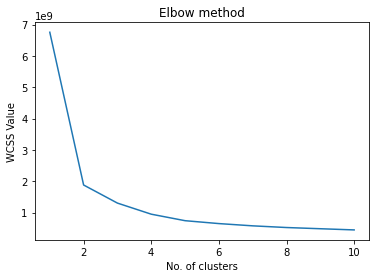

In [60]:
# Elbow method
""" 
ELBOW METHOD

Purpose: to determine the optimal value for k cluster

Tune your hyperparameters appropriately e.g. n_clusters, n_init etc

"""

plt.plot(range(1,11), WCSS)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS Value")
plt.show()

According to the elbow method, the appropriate number of clusters for our algorithm is 4

In [61]:
# Let's fit our k value
K = 3
kmeans=KMeans(n_clusters=K, init="k-means++", max_iter= 300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

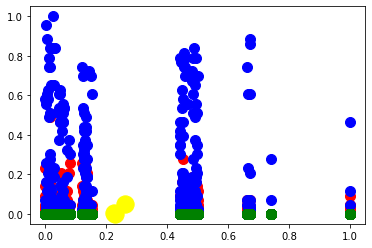

In [62]:

# c = np.random.rand(20)

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, color="red", label="Goalkeeper")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, color="blue", label="Defender")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, color="green", label="Midfielder")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, color="cyan", label="Attacker")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,color="yellow",label="Centroids")
plt.show()

In [37]:
reduced['cluster'] = 
reduced['name'] = names

,0,1
0,0.648404,-0.005847
1,0.051219,-0.462045
2,-0.056887,-0.379141
3,-0.012539,-0.400498
4,0.662518,0.049718
